In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sanbomics.plots import volcano
from adjustText import adjust_text
import os
import df_helpers as helper
dirs = helper.dirs()
pd.set_option('display.max_colwidth', None)  

    


In [2]:
D100_df = helper.read_results(None,'D100')
DCTRL0_df = helper.read_results(None,'DCTRL0')
DCTRL10_df = helper.read_results(None,'DCTRL10')
cytokegg = helper.get_cytoKEGGlist()



In [7]:

log2FCthresh = 1
df = DCTRL10_df
df.rename(columns={'Symbol':'symbol'},inplace=True)

gsea_df = pd.read_excel(f'{dirs.gsea}/GSEA D37_results.xlsx')
pathway = gsea_df[gsea_df.fdr<0.25].Term[0]
GOI = str(gsea_df[gsea_df.Term ==  'regulation of gene expression, epigenetic (GO:0040029)'].lead_genes).split(';')
GOI[0] = GOI[0].split(' ')[-1]
GOI = GOI[:-1]
# GOI = ['KMT2A','KMT2B','KMT2C','KMT2D','SETD1A','SETD1B','KDM2B','KDM5A','KDM5B','KDM5C','KDM5D']


FileNotFoundError: [Errno 2] No such file or directory: '6. GSEA Plots/GSEA D37_results.xlsx'

['PODXL']


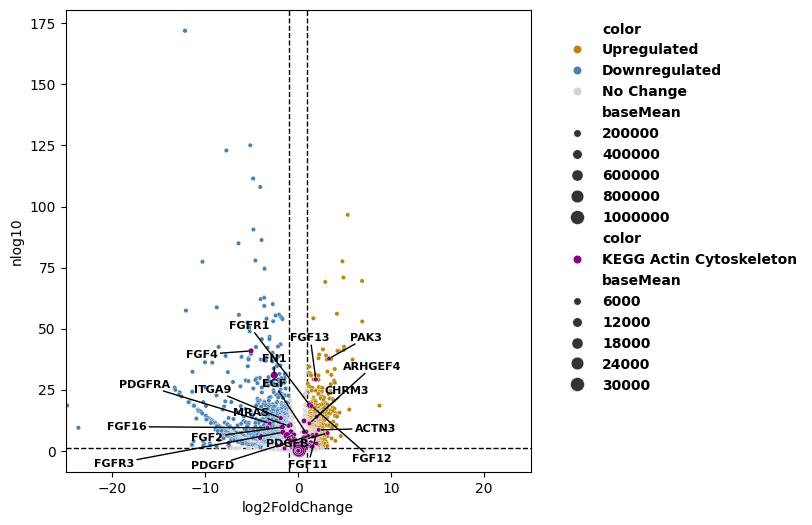

In [421]:
plt.figure(figsize=(6,6))
sns.set_palette("tab10")
log2FCthresh = 1
sig=DCTRL10_df.reset_index()
sig['nlog10'] = -np.log10(sig.padj)
def map_color(a):
    log2FC, symbol, nlog10 = a

    if symbol in cytokegg: return 'KEGG Actin Cytoskeleton'
    elif log2FC > log2FCthresh and nlog10 > 1.3: return 'Upregulated'
    elif log2FC < -log2FCthresh and nlog10 > 1.3: return 'Downregulated'
    return 'No Change'

sig['color'] = sig[['log2FoldChange','Symbol','nlog10']].apply(map_color,axis=1)

def map_shape(symbol):
    if symbol in cytokegg:
        return 'KEGG Actin Cytoskeleton'
    return 'other'

sig['shape'] = sig.Symbol.map(map_shape)


ax = sns.scatterplot(data=sig, x = 'log2FoldChange',y='nlog10', 
                     hue='color', hue_order = ['Upregulated','Downregulated','No Change'],
                     palette=['darkgoldenrod','steelblue','lightgrey'], 
                     size='baseMean', sizes = (10,100))
ax = sns.scatterplot(data=sig[sig.Symbol.isin(cytokegg)], x = 'log2FoldChange',y='nlog10', 
                     hue='color', hue_order = ['KEGG Actin Cytoskeleton'],
                     palette=['purple'], 
                     size='baseMean', sizes = (10,100))
ax.axhline(1.3, zorder = 0, c='k',lw=1,ls='--')
ax.axvline(log2FCthresh, zorder = 0, c='k',lw=1,ls='--')
ax.axvline(-log2FCthresh, zorder = 0, c='k',lw=1,ls='--')


# # Filter the data based on condition
filtered_sig = sig[sig['Symbol'].isin(cytokegg)]

# # Randomly select a subset of points
# subset_indices = np.random.choice(filtered_sig.index, size=75, replace=False)
# subset = filtered_sig.loc[subset_indices]

texts = []
for i in range(25):
    if filtered_sig.iloc[i].nlog10 > 5 and abs(filtered_sig.iloc[i].log2FoldChange) > 1:
        texts.append(plt.text(x = filtered_sig.iloc[i].log2FoldChange, y = filtered_sig.iloc[i].nlog10, s = filtered_sig.iloc[i].Symbol,
                             fontsize = 8, weight = 'bold'))

podxl_sig = sig[sig.Symbol == 'PODXL']
print(podxl_sig.Symbol.values)
if podxl_sig.nlog10.values > 5 and abs(podxl_sig.log2FoldChange.values) > 1:
    texts.append(plt.text(x = podxl_sig.log2FoldChange, y = podxl_sig.nlog10, s = 'PODXL', fontsize = 8, weight = 'bold'))
        
        
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'),time_lim=1,force_text=(0.5, 0.7),expand=(2,2))


# plt.ylim(0, 65)
plt.xlim(-25,25) 
plt.legend(loc = 1, bbox_to_anchor = (1.6,1), frameon = False, prop = {'weight':'bold'})
plt.savefig(f'{dirs.volcano}/DCTRL10 Volcano.png',dpi=300,bbox_inches='tight')

In [132]:
sig[sig.Symbol.isin(cytokegg)].iloc[1:30]

,Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10,color,shape
48,FGFR1,3029.223719,2.566245,0.109904,23.349942,1.380035e-120,9.268487e-118,117.032991,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
150,ARPC1B,1347.789110,-1.878334,0.097452,-19.274463,8.800823e-83,1.918055e-80,79.717139,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
193,PIK3CD,393.264588,1.649202,0.089935,18.337788,4.132716e-75,7.010493e-73,72.154251,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
196,ITGAM,163.268581,-7.731966,0.422211,-18.313056,6.511055e-75,1.087677e-72,71.963500,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
209,ITGB1,5336.090464,2.032991,0.111818,18.181242,7.266867e-74,1.138787e-71,70.943557,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
214,ITGA5,319.073540,3.670884,0.202658,18.113658,2.486603e-73,3.806122e-71,70.419517,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
311,PAK1,2045.474853,1.510410,0.090691,16.654461,2.808638e-62,2.962483e-60,59.528344,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
314,WASF1,132.383599,2.556466,0.153700,16.632863,4.028770e-62,4.208978e-60,59.375823,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
354,ITGA9,472.431703,3.249313,0.199451,16.291246,1.138855e-59,1.055735e-57,56.976445,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
383,MYH10,6308.617751,0.896743,0.056185,15.960660,2.401771e-57,2.058330e-55,54.686485,KEGG Actin Cytoskeleton,KEGG Actin Cytoskeleton
